<a href="https://colab.research.google.com/github/Jun-Liu-291/OCR-/blob/master/EMNIST_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys

sys.path.append('/content/drive/My Drive/Colab Notebooks')

Using TensorFlow backend.


In [ ]:
%cd /content/drive/My Drive/dataset/EMNIST

!pwd

/content/drive/My Drive/dataset/EMNIST
/content/drive/My Drive/dataset/EMNIST


In [ ]:
from emnist_preprocessing import show_img
from emnist_preprocessing import load_data_label

In [ ]:
train_data_path = 'emnist-balanced-train.csv'
test_data_path = 'emnist-balanced-test.csv'

train_data = pd.read_csv(train_data_path, header=None)
test_data = pd.read_csv(test_data_path, header=None)

train_data.shape
test_data.shape

(18800, 785)

In [ ]:
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

num_classes = len(class_mapping)

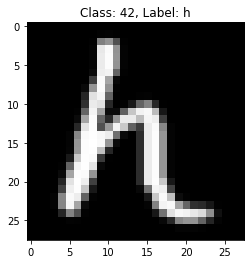

In [ ]:
show_img(train_data, 1220)

In [ ]:
X, y = load_data_label(train_data_path)
print('The data shape is: ',X.shape)
print('The label shape is: ',y.shape)

The data shape is:  (112800, 28, 28, 1)
The label shape is:  (112800, 47)


In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.1,
    rotation_range = 15,
    width_shift_range = .15,
    height_shift_range = .15,
)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding = 'same', input_shape=(28,28,1)))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(32, (3,3), padding = 'same'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64, (3,3), padding = 'same'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(64, (3,3), padding = 'same'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Conv2D(128, (3,3), padding = 'same'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dense(512))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)       

In [ ]:
# setting the optimizer and learning rate
learning_rate = 1e-3
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
  
# Compile the model with the optimizer and learning rate specified in hpyarams
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:

# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = keras.callbacks.ReduceLROnPlateau(
    monitor="loss",
    factor = 0.5,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-7)

# save whole model when get a better val accuracy
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'EMNIST_t2.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_acc',
    mode='max',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 10))

In [ ]:
history = model.fit_generator(training_data_generator, 
                              steps_per_epoch=500, epochs=200,
                              validation_data=validation_data_generator,
                              callbacks = my_callbacks)

Epoch 1/200
500/500 [==============================] - 168s 335ms/step - loss: 1.6986 - acc: 0.4996 - val_loss: 0.7736 - val_acc: 0.6902
Epoch 2/200
500/500 [==============================] - 166s 332ms/step - loss: 0.8734 - acc: 0.7157 - val_loss: 0.9274 - val_acc: 0.7264
Epoch 3/200
500/500 [==============================] - 168s 336ms/step - loss: 0.7551 - acc: 0.7484 - val_loss: 0.9352 - val_acc: 0.7548
Epoch 4/200
500/500 [==============================] - 170s 339ms/step - loss: 0.6978 - acc: 0.7642 - val_loss: 0.7891 - val_acc: 0.7827
Epoch 5/200
500/500 [==============================] - 169s 339ms/step - loss: 0.6597 - acc: 0.7757 - val_loss: 0.8622 - val_acc: 0.7768
Epoch 6/200
500/500 [==============================] - 173s 346ms/step - loss: 0.6537 - acc: 0.7768 - val_loss: 0.7651 - val_acc: 0.7846
Epoch 7/200
500/500 [==============================] - 169s 337ms/step - loss: 0.6225 - acc: 0.7852 - val_loss: 0.2752 - val_acc: 0.7891
Epoch 8/200
500/500 [====================

(1e-05, 0.1, 0.5, 4.0)

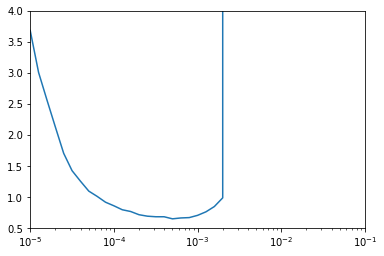

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 1e-1, 0.5, 4])

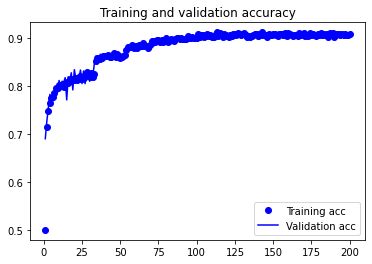

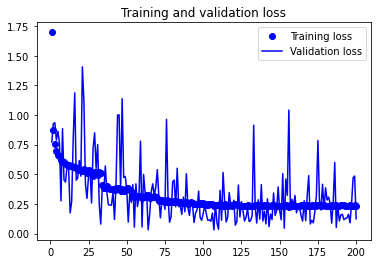

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()